# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Displaying URL from openweather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()
response
# Capture city information
data = []
# set up lists to hold reponse info

#create row counter
counter=0
set_num=1
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
city_list=[]
print("Beginning Data Retrieval")
print("-"*30)
# Iterrows: loop cities in query_url
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        #update record number and set number
        if counter>=49:
            counter=1
            set_num+=1
            city_list.append(city)
        else:
            counter+=1
            city_list.append(city)
        print(f"Processing Record {counter} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | kelvington
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 7 of Set 1 | nantucket
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | karratha
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | lebu
City not found. Skipping...
Processing Record 19 of Set 1 | macomer
Processing Record 20 of Set 1 | berck
Processing Record 21 of Set 1 | high lev

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_dict={"City":city_list,
             "Cloudiness":clouds,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":latitude,
             "Longitude":longitude,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [8]:
cities_df=pd.DataFrame(cities_dict)
cities_df.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Latitude      601
Longitude     601
Max Temp      601
Wind Speed    601
dtype: int64

In [9]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kelvington,1,CA,1597159511,67,52.17,-103.53,58.62,12.17
1,waingapu,45,ID,1597159512,82,-9.66,120.26,76.53,4.07
2,ushuaia,75,AR,1597159346,74,-54.80,-68.30,35.60,21.92
3,punta arenas,40,CL,1597159512,75,-53.15,-70.92,39.20,31.09
4,sitka,75,US,1597158958,87,57.05,-135.33,51.80,1.45


In [10]:
cities_df.to_csv("city_weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

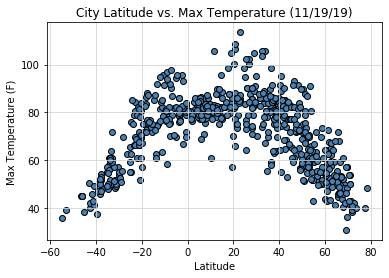

In [12]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Humidity Plot

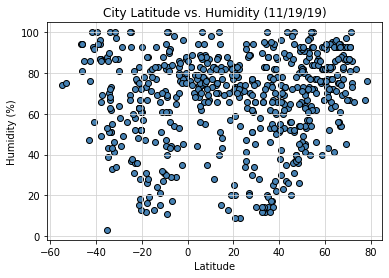

In [13]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Humidity (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Cloudiness Plot

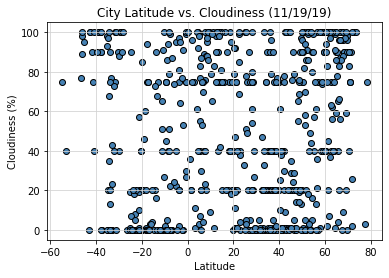

In [14]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Wind Speed Plot

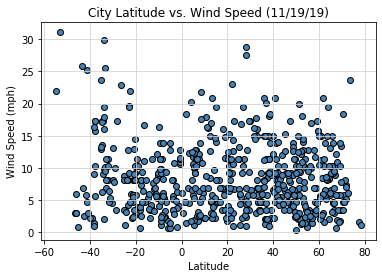

In [15]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression